# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Luis Fernando - FTDS010 - Milestone 1 Phase 2

Objective yang ingin dicapai :
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural - Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Input
from tensorflow.keras import initializers
from sklearn.metrics import classification_report,roc_auc_score
from tensorflow.keras import backend
from tensorflow.keras.initializers import he_normal,he_uniform
from imblearn.pipeline import Pipeline
from tensorflow.keras import regularizers
from tensorflow.data import Dataset
from imblearn.over_sampling import SMOTENC

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Ada kolom customerID yang mungkin akan dieliminasi, karena terlihat bahwa korelasi customerID yang tidak ada dengan hasil / target column nya

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pada tampilan di atas terlihat bahwa TotalCharges dianggap sebagai tipe data object, padahal secara tampilan seharusnya tipedatanya adalah float, sehingga akan kita convert terlebih dahulu untuk TotalCharges ke dari object ke float

Namun , saat saya mencoba melihat kondisi data TotalCharges, ternyata ada 11 data yang TotalCharges nya berbentuk string ' '. Sehingga, pada kasus ini, akan Ada 2 cara yang dapat dilakukan : 
1. Mereplace string ' ' dengan menggunakan NaN, kemudian nanti dapat diimpute menggunakan simpleImputer(median atau mean)
2. Menghapus data yang mengandung ' ' tersebut.

Pada kasus ini, saya akan coba fill terlebih dahulu kekosongan pada data tersebut menggunakan NaN , kemudian baru akan saya impute sesuai dengan distribusi datanya, jika skew menggunakan median , jika normal menggunakan mean

In [7]:
df.loc[df['TotalCharges']==' ','TotalCharges'] = np.nan

Setelah melakukan convert data dari yang sebelumnya mengandung string ' ' menjadi nan, sekarang dapat kita convert tipe data kolom TotalCharges menjadi float

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df['TotalCharges'].dtypes

dtype('float64')

Sekarang, untuk 'TotalCharges' telah berubah tipe data dari object menjadi float. Kita bisa lanjut ke tahapan selanjutnya

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari data di atas dapat dilihat bahwa kebanyakan data adalah bertipe data object, kemudian juga ada data null pada TotalCharges sejumlah 11. Sehingga, pada data yang nan ini akan kita lakukan imputing, besar kemungkinan menggunakan simpleimputer dengan strategy mean / median.

Selanjutnya kita lihat apa saja nilai unique masing - masing kolom untuk dapat melihat secara sekilas apakah data tersebut bertipe data kategorik atau numerik

In [11]:
for cat_col in df.select_dtypes(include=object).columns.tolist():
  print(cat_col)
  print(df[cat_col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Dari bentuk di atas menunjukkan bahwa ada kategorik yang memiliki hasil yang serupa. Misalnya, ada 6 kolom kategorik yang sama - sama menyebutkan tentang 'No internet service' . Dan kemudian juga ada kolom InternetService yang juga memiliki value unique 'No' . Mungkin akan ada hubungan antara nantinya antara 6 kolom tsb dengan InternetService

Kemudian , hal yang perlu diperhatikan, kolom SeniorCitizen adalah kolom yang bersifat kategorikal, sehingga pada kolom SeniorCitizen akan kita anggap sebagai cat columns, bukan num columns. Buktinya dapat dilihat saat kita melihat jumlah unique value pada masing" kolom di tahapan selanjutna

In [13]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Dari kolom di atas , menunjukkan bahwa yang termasuk data numerik hanya ada 3 , yaitu tenure, monthlycharges, dan totalcharges. Selanjutnya kita lanjut ke EDA

# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Melihat jumlah target column yang churn dengan yang tidak

No     5174
Yes    1869
Name: Churn, dtype: int64


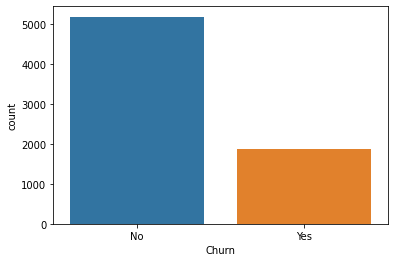

In [14]:
print(df['Churn'].value_counts())
sns.countplot(x=df.Churn)

Terlihat bahwa dari kondisi dataset yang diberikan, terdiri dari No yang berjumlah 5174 dan Yes yang berjumlah 1869. Dalam hal ini, sebenarnya saat data preprocessing, kita dapat melakukan handling imbalance atau juga tidak (saya memanfaatkan threshold 1:3 untuk mengasumsikan bahwa sebuah data tersebut dapat dianggap imbalance)

### Korelasi antara InternetService, dengan Online Security

In [15]:
summary_data = df.groupby(['InternetService','OnlineSecurity'])['customerID'].count()
summary_data

InternetService  OnlineSecurity     
DSL              No                     1241
                 Yes                    1180
Fiber optic      No                     2257
                 Yes                     839
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat, bahwa setiap InternetService nya No , OnlineSecurity nya juga ber-value "No internet service".

### Korelasi antara InternetService, dengan OnlineBackup

In [16]:
summary_data = df.groupby(['InternetService','OnlineBackup'])['customerID'].count()
summary_data

InternetService  OnlineBackup       
DSL              No                     1335
                 Yes                    1086
Fiber optic      No                     1753
                 Yes                    1343
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat , bahwa setiap InternetService nya No , OnlineBackup nya juga ber-value "No Internet service"

### Korelasi antara InternetService, dengan DeviceProtection

In [17]:
summary_data = df.groupby(['InternetService','DeviceProtection'])['customerID'].count()
summary_data

InternetService  DeviceProtection   
DSL              No                     1356
                 Yes                    1065
Fiber optic      No                     1739
                 Yes                    1357
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat, bahwa setiap InternetService nya No, DeviceProtection nya "No internet service"

### Korelasi antara InternetService dengan TechSupport

In [18]:
summary_data = df.groupby(['InternetService','TechSupport'])['customerID'].count()
summary_data

InternetService  TechSupport        
DSL              No                     1243
                 Yes                    1178
Fiber optic      No                     2230
                 Yes                     866
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat, bahwa setiap InternetService nya No, TechSupport nya "No internet service"

### Korelasi antara InternetService dengan StreamingTV

In [19]:
summary_data = df.groupby(['InternetService','StreamingTV'])['customerID'].count()
summary_data

InternetService  StreamingTV        
DSL              No                     1464
                 Yes                     957
Fiber optic      No                     1346
                 Yes                    1750
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat, bahwa setiap InternetService nya No , StreamingTV nya "No internet service"

### Korelasi antara InternetService dengan StreamingMovies

In [20]:
summary_data = df.groupby(['InternetService','StreamingMovies'])['customerID'].count()
summary_data

InternetService  StreamingMovies    
DSL              No                     1440
                 Yes                     981
Fiber optic      No                     1345
                 Yes                    1751
No               No internet service    1526
Name: customerID, dtype: int64

Dapat dilihat, bahwa setiap InternetService nya No, StreamingMovies nya juga "No internet service"

Dari EDA tentang InternetService, dapat dilihat bahwa ketika InternetService nya No , akan mempengaruhi hasil dari 6 kolom di atas

Selanjutnya, kita coba akan lihat, bagaimana kondisi data yang InternetService nya No

In [21]:
df_noInternet = df[df['InternetService']=='No']
df_noInternet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Dengan memanfaatkan df_noInternet, kita akan lihat bagaimana nilai unique masing - masing kolom

In [22]:
for cat_col in df_noInternet.select_dtypes(include=object).columns.tolist():
  print(cat_col)
  print(df_noInternet[cat_col].unique())

customerID
['7469-LKBCI' '8191-XWSZG' '1680-VDCWW' ... '9837-FWLCH' '0871-OPBXW'
 '2569-WGERO']
gender
['Male' 'Female']
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
PhoneService
['Yes']
MultipleLines
['No' 'Yes']
InternetService
['No']
OnlineSecurity
['No internet service']
OnlineBackup
['No internet service']
DeviceProtection
['No internet service']
TechSupport
['No internet service']
StreamingTV
['No internet service']
StreamingMovies
['No internet service']
Contract
['Two year' 'One year' 'Month-to-month']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check']
Churn
['No' 'Yes']


### Melihat persebaran data pada kolom numerik

In [23]:
df.select_dtypes(exclude=object).columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Skewness :  1.8336327440928564


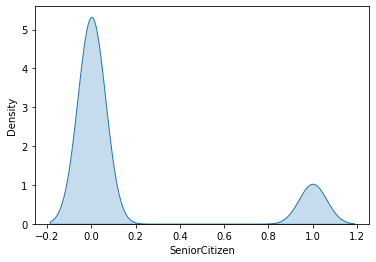

In [24]:
sns.kdeplot(data=df,x='SeniorCitizen',fill=True)
print("Skewness : ",df['SeniorCitizen'].skew())

Pada kolom SeniorCitizen ,terlihat bahwa ada 2 lembah yang terbentuk , dimana satu berinterval -0.2 hingga 0.2 , sedangka 1 lagi berinterval 0.8 hingga 1.2

Kemudian , skewnessnya berada di angka 1.83, yang artinya kolom SeniorCitizen tersebut memiliki distribusi Skew

Skewness :  0.2395397495619829


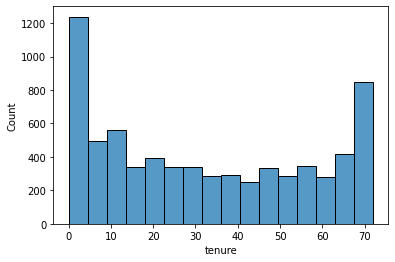

In [25]:
sns.histplot(data=df,x='tenure',fill=True)
print("Skewness : ",df['tenure'].skew())

Pada kolom tenure, terlihat bahwa tenure yang diambil customer beraneka ragam,mulai dari 0 hingga 70 , dengan tertinggi berada di 0 , yang mungkin diasumsikan tidak pernah mengambil / tidak sedang mengambil tenure

Kemudian, skewnessnya berada di angka 0.23 , yang berarti kolom tenure memiliki distribusi normal

Skewness :  -0.22052443394398033


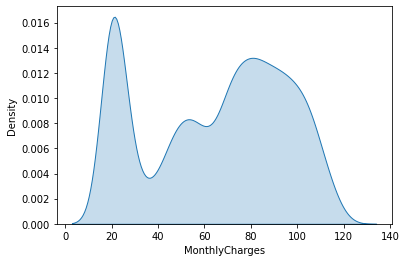

In [26]:
sns.kdeplot(data=df,x='MonthlyCharges',fill=True)
print("Skewness : ",df['MonthlyCharges'].skew())

Dari grafik di atas, terlihat bahwa monthly charges tertinggi jumlahnya adalah di angka 20 , dan juga 80 hingga 100.

Kemudian , skewnessnya berada di angka -0.2 ,yang berarti kolom MonthlyCharges memiliki distribusi normal

Skewness :  0.961642499724251


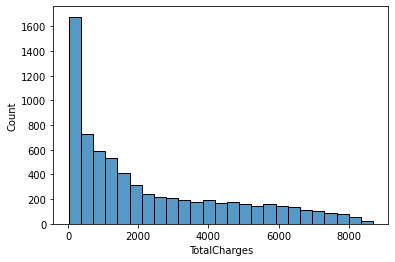

In [27]:
sns.histplot(data=df,x='TotalCharges',fill=True)
print("Skewness : ",df['TotalCharges'].skew())

Dari grafik di atas, terlihat bahwa TotalCharges tertinggi jumlahnya adalah di sekitar 0 hingga 300 , kemudian semakin mengecil seperti anak tangga hingga terbesar adalah di 8000. 

Kemudian, skewnessnya berada di angka 0.96, yang berarti kolom TotalCharges memiliki distribusi skew

Dari melihat kondisi data di atas, terlihat bahwa tidak ada handling outlier yang perlu dilakukan. Mengapa ? Karena ,menurut saya, kondisi data numerik yang masih berada di kondisi yang masuk akal sesuai keadaan aslinya.  

Selanjutnya, kita lihat korelasi antara masing - masing kolom dengan kolom lainnya, menggunakan heatmap

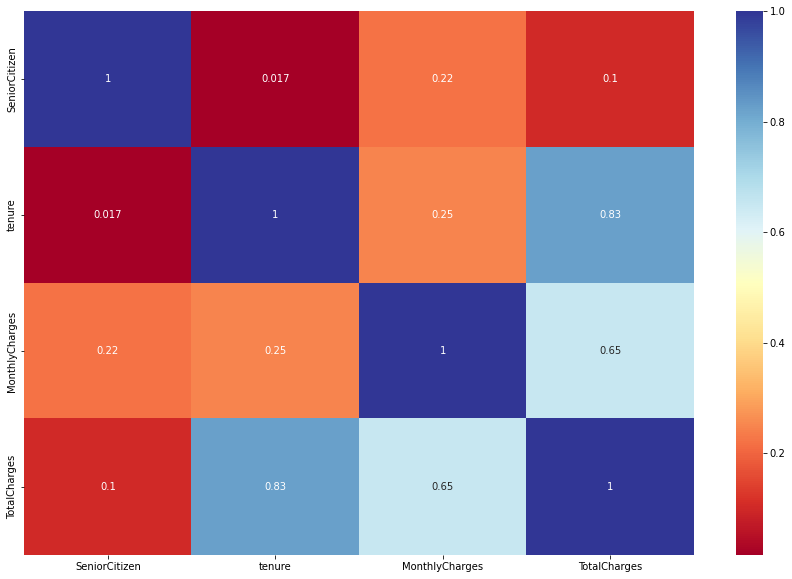

In [28]:
fig,ax = plt.subplots(figsize=(15,10),nrows=1,ncols=1)
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu',ax=ax)
plt.show()

Beradasarkan data numeriknya , dapat dilihat bahwa tidak ada korelasi yang kuat antara kolom satu dengan yang lainnya. Sehingga, untuk antar kolom numerik tidak perlu dilakukan eliminasi.

Sekarang, kita lihat bagaimana korelasi kolom yang bertipe objectnya, apakah memiliki korelasi dengan kolom lainnya , seperti internet di atas. 

Akan tetapi , kita perlu melakukan encoding terlebih dahulu pada kolom kategorik tersebut

In [29]:
df_corr = df.copy()

In [30]:
cat_enc_corr = df_corr.select_dtypes(include=object).columns.tolist()
num_enc_corr =  df_corr.select_dtypes(exclude=object).columns.tolist()
cat_enc_corr

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:
ct = ColumnTransformer(transformers=[
                                     ("cat_enc",OrdinalEncoder(),cat_enc_corr),
                                     ("num_scale",StandardScaler(),num_enc_corr)
])

ct.fit(df_corr)
df_corr_enc = ct.transform(df_corr)

In [32]:
df_corr_enc = pd.DataFrame(df_corr_enc,columns=cat_enc_corr+num_enc_corr)
df_corr_enc

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,5375.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,-0.439916,-1.277445,-1.160323,-0.994194
1,3962.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1.0,0.0,3.0,0.0,-0.439916,0.066327,-0.259629,-0.173740
2,2564.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,-0.439916,-1.236724,-0.362660,-0.959649
3,5535.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.439916,0.514251,-0.746535,-0.195248
4,6511.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,-0.439916,-1.236724,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,...,2.0,2.0,1.0,1.0,3.0,0.0,-0.439916,-0.340876,0.665992,-0.129180
7039,1525.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,...,2.0,2.0,1.0,1.0,1.0,0.0,-0.439916,1.613701,1.277533,2.241056
7040,3367.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,-0.439916,-0.870241,-1.168632,-0.854514
7041,5934.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.273159,-1.155283,0.320338,-0.872095


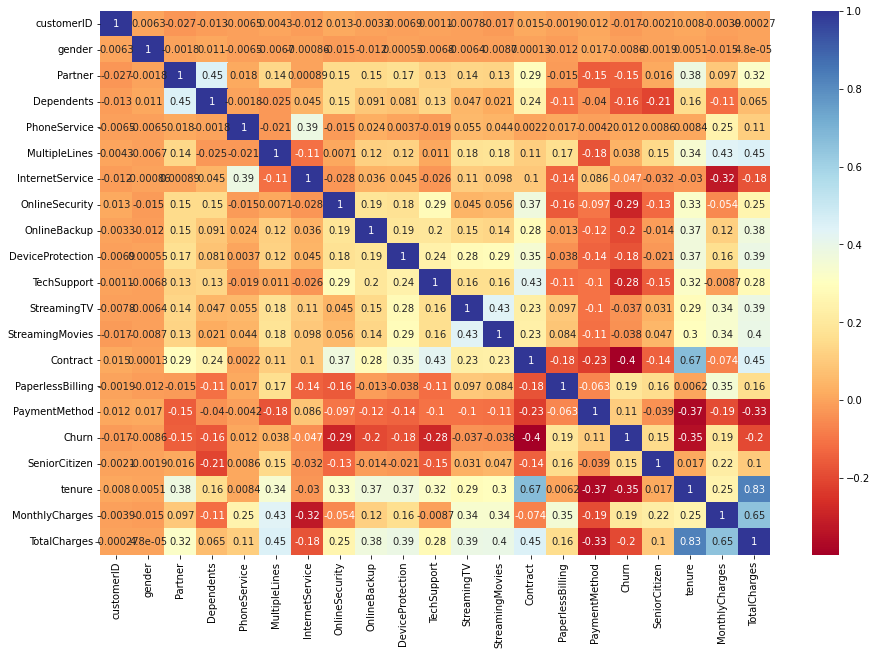

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.heatmap(df_corr_enc.corr(),annot=True,cmap='RdYlBu',ax=axes)

Dengan memanfaatkan heatmap ,terlihat bahwa ternyata korelasi antara kolom dengan kolom lain ada yang berkorelasi cukup tinggi, yaitu korelasi antara tenure dengan TotalCharges . 

Selanjutnya, kita tidak dapat melakukan feature selection dari melihat kondisi heatmap nya, karena tidak ada yang berkorelasi secara penuh (>0.95) untuk antar fitur. Namun kita lihat terlebih dahulu secara visualisasi , bagaimana korelasi antara TotalCharges dengan Tenure

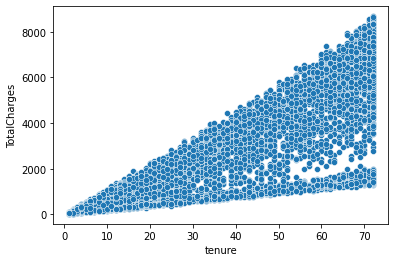

In [34]:
sns.scatterplot(data=df,x='tenure',y='TotalCharges')

Terlihat secara visual bahwa hubungan tenure dengan TotalCharges seperti anak tangga, namun tidak begitu linear , sehingga akan kita skip saja mengenai keputusan eliminasi antara 2 kolom ini.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



Selanjutnya, kita lakukan data splitting terlebih dahulu untuk kemudian melakukan preprocessing data yang didasarkan dengan data trainingnya terlebih dahulu. Kemudian , tidak lupa kita lakukan label encoding terlebih dahulu pada kolom target, dimana jika Yes diganti 1 , dan No diganti 0

In [35]:
df['Churn'] = df['Churn'].map(dict(Yes=1,No=0))

In [36]:
X = df.drop(columns='Churn',axis=1)
y = df['Churn']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [38]:
X_train.shape

(5387, 20)

In [39]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=object).columns.tolist()
num_columns,cat_columns

(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

Perlu kita ingat, bahwa SeniorCitizen bukan num_columns, sehingga tidak akan kita lakukan scaling pada data ini

In [40]:
num_columns.remove('SeniorCitizen')
cat_columns.append('SeniorCitizen')

In [41]:
num_columns,cat_columns

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'SeniorCitizen'])

Setelah itau kita lakukan pemisahan antara data yang bersifat numerik dan kategorik untuk masing" data train, test, dan validation

In [42]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

In [43]:
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
6000,52,19.65,928.40
2669,19,95.15,1789.25
167,72,89.05,6254.45
670,53,19.85,1039.45
6200,59,19.50,1222.65


In [44]:
X_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
6000,9503-XJUME,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
2669,4659-NZRUF,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
167,5997-OPVFA,Male,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
670,5642-MHDQT,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
6200,7328-ZJAJO,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


### Handling Outlier

Pada kasus ini, saya tidak melakukan handling outlier, karena seperti yang sudah disebutkan sebelumnya, bahwa tidak ada data yang 'valuenya menyimpang' setelah dilakukan EDA sebelumnya

### Handling Missing Values

Sebelumnya, kita melihat bahwa missing values terjadi pada dataset dengan kolom TotalCharges. Kita tahu bahwa distribusinya merupakan skew, sehingga akan kita coba lakukan imputasi menggunakan simple imputer dengan strategy 'Median'

In [45]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')

imputer.fit(X_train_num)

X_train_num = imputer.transform(X_train_num)

X_test_num = imputer.transform(X_test_num)

X_val_num = imputer.transform(X_val_num)

In [46]:
X_train_num = pd.DataFrame(X_train_num,columns=num_columns)
X_test_num = pd.DataFrame(X_test_num,columns=num_columns)
X_val_num = pd.DataFrame(X_val_num,columns=num_columns)

In [47]:
print(X_train_num.isna().values.any())
print(X_test_num.isna().values.any())
print(X_val_num.isna().values.any())

False
False
False


Terlihat bahwa data numerik pada train test dan validation sudah terinput semua data nan nya. Selanjutnya kita ke Feature Selection

### Feature Selection

Pada kasus ini, kita akan memanfaatkan X_train dan y_train untuk melihat feature importance nya dengan menggunakan RandomForestClassifier

In [48]:
X_train_num.shape

(5387, 3)

In [49]:
X_train_cat.shape

(5387, 17)

In [50]:
X_train = pd.DataFrame(np.concatenate((np.array(X_train_num),np.array(X_train_cat)),axis=1),columns=num_columns+cat_columns)

Lakukan hal yang sama X_train = pd.DataFrame(...) kepada X_test dan X_val

In [51]:
X_test = pd.DataFrame(np.concatenate((np.array(X_test_num),np.array(X_test_cat)),axis=1),columns=num_columns+cat_columns)
X_val = pd.DataFrame(np.concatenate((np.array(X_val_num),np.array(X_val_cat)),axis=1),columns=num_columns+cat_columns)

In [52]:
X_train_inference = X_train.copy()
y_train_inference = y_train.copy()

In [53]:
feature_encoder = LabelEncoder()

for item in X_train_inference:
  if X_train_inference[item].dtypes == 'object':
    X_train_inference[item] = feature_encoder.fit_transform(X_train_inference[item])

In [54]:
feature_scaler = StandardScaler()

X_train_inference = feature_scaler.fit_transform(X_train_inference)

In [55]:
X_train_inference = pd.DataFrame(X_train_inference,columns=X_train.columns.tolist())
X_train_inference

,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
0,0.797485,-1.368370,-0.379073,1.561965,0.993524,-0.967666,1.536416,0.332749,-1.004342,1.519861,0.248052,0.101783,0.105626,0.226611,0.010505,0.005042,0.368013,-1.204518,-0.544710,-0.43947
1,-0.541949,1.060869,0.225531,-0.118321,-1.006518,-0.967666,-0.650865,0.332749,1.106206,0.168567,1.414069,1.239350,-1.032389,-0.933803,-1.121277,1.136776,-0.828419,0.830207,0.392483,-0.43947
2,1.609264,0.806933,1.456071,0.365895,0.993524,1.033415,-0.650865,0.332749,1.106206,-1.182727,1.414069,1.239350,1.243641,1.387026,1.142287,1.136776,1.564445,0.830207,-1.481903,-0.43947
3,0.838074,-1.359381,-0.287083,0.232140,-1.006518,1.033415,1.536416,0.332749,-1.004342,1.519861,0.248052,0.101783,0.105626,0.226611,0.010505,0.005042,0.368013,0.830207,-1.481903,-0.43947
4,1.081608,-1.375112,-0.147764,0.826960,-1.006518,1.033415,1.536416,0.332749,-1.004342,1.519861,0.248052,0.101783,0.105626,0.226611,0.010505,0.005042,1.564445,-1.204518,-0.544710,-0.43947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,1.081608,0.323782,1.069444,1.104757,0.993524,1.033415,1.536416,0.332749,-1.004342,-1.182727,-0.917965,1.239350,1.243641,1.387026,1.142287,1.136776,0.368013,-1.204518,-0.544710,-0.43947
5383,1.487497,-0.298696,0.946790,0.817958,0.993524,1.033415,1.536416,0.332749,-1.004342,-1.182727,1.414069,1.239350,1.243641,-0.933803,-1.121277,-1.126692,1.564445,0.830207,-1.481903,-0.43947
5384,1.609264,-1.240279,0.200200,0.120250,-1.006518,1.033415,-0.650865,0.332749,1.106206,1.519861,0.248052,0.101783,0.105626,0.226611,0.010505,0.005042,1.564445,-1.204518,0.392483,-0.43947
5385,-1.272550,-1.256009,-1.586282,0.142757,0.993524,-0.967666,1.536416,-3.005272,0.050932,-1.182727,-0.917965,-1.035783,-1.032389,-0.933803,-1.121277,-1.126692,-0.828419,-1.204518,1.329677,-0.43947


Setelah melakukan encoding dan scling kepada seluruh kolom , kita lakukan feature importance dengan menggunakan model random forest classifier. Namun , sebelum melakukan feature importance, saya akan melakukan eliminasi customerID terlebih dahulu, karena bisa saja feature importance untuk feature lainnya meningkat setelah feature customerID dilakukan. customerID saya eliminasi terlebih dahulu karena menurut saya customerID sudah dari awal tidak merepresentasikan feature yang memiliki pengaruh

In [56]:
X_train_inference = X_train_inference.drop('customerID',axis=1)

In [57]:
rfc_importance = RandomForestClassifier()
rfc_importance.fit(X_train_inference,y_train)

model_importance = rfc_importance.feature_importances_
i =0
for item in X_train.drop('customerID',axis=1):
  print(f'Feature importance dari {item}:', model_importance[i])
  i+=1

Feature importance dari tenure: 0.15214423128456342
Feature importance dari MonthlyCharges: 0.177384994264507
Feature importance dari TotalCharges: 0.18708284491783064
Feature importance dari gender: 0.027751640872794008
Feature importance dari Partner: 0.023446994758093944
Feature importance dari Dependents: 0.019507502592215818
Feature importance dari PhoneService: 0.005139713282641431
Feature importance dari MultipleLines: 0.021891749367742897
Feature importance dari InternetService: 0.027594364485113418
Feature importance dari OnlineSecurity: 0.03988869673033025
Feature importance dari OnlineBackup: 0.02834443779097181
Feature importance dari DeviceProtection: 0.02123492687072787
Feature importance dari TechSupport: 0.04946158873274925
Feature importance dari StreamingTV: 0.01723019899703953
Feature importance dari StreamingMovies: 0.0171736667036982
Feature importance dari Contract: 0.08652115675621945
Feature importance dari PaperlessBilling: 0.026360215541775076
Feature importan

Dari feature importance yang dimunculkan , saya akan mengambil beberapa kolom saja, dimana saya hanya akan mengambil feature importance yang >= 5% saja. Dan feature tersebut adalah : 

tenure,MonthlyCharges,TotalCharges,OnlineSecurity,Contract, dan PaymentMethod

Sekarang kita ambil feature itu saja untuk dijadikan sebagai feature yang penting / berpengaruh

In [58]:
selected_features = ['tenure','MonthlyCharges','TotalCharges','OnlineSecurity','Contract','PaymentMethod']

In [59]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

In [60]:
X_train_cat = X_train_cat[['OnlineSecurity','Contract','PaymentMethod']]
X_test_cat = X_test_cat[['OnlineSecurity','Contract','PaymentMethod']]
X_val_cat = X_val_cat[['OnlineSecurity','Contract','PaymentMethod']]

### Feature Scaling

Pada kasus ini, kita ketahui bahwa ada 3 kolom numerik saja yang berada di dataset ini, yaitu SeniorCitizen, tenure, dan MonthlyCharges. Setelah dilihat distribusi datanya, akan kita pisahkan antara kolom yang memiliki distribusi skew dan normal, yaitu memanfaatkan StandardScaler untuk kolom berdistribusi normal dan MinMaxScaler untuk kolom berdistribusi Skew

In [61]:
num_skew = ['TotalCharges']
num_normal = ['tenure','MonthlyCharges']

mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

mm_scaler.fit(X_train_num[num_skew])
X_train_num_skew = mm_scaler.transform(X_train_num[num_skew])
X_test_num_skew = mm_scaler.transform(X_test_num[num_skew])
X_val_num_skew = mm_scaler.transform(X_val_num[num_skew])

std_scaler.fit(X_train_num[num_normal])
X_train_num_normal = std_scaler.transform(X_train_num[num_normal])
X_test_num_normal = std_scaler.transform(X_test_num[num_normal])
X_val_num_normal = std_scaler.transform(X_val_num[num_normal])

Kita gabungkan kembali data train numerik yang berdistribusi normal dan skew (yang sudah di scaling) , dengan menggunakan pd.DataFrame

In [62]:
X_train_num_scaled = pd.DataFrame(np.concatenate([X_train_num_skew,X_train_num_normal],axis=1),columns=num_skew+num_normal)

Lakukan hal sama seperti di atas kepada data numerik test dan validation

In [63]:
X_test_num_scaled = pd.DataFrame(np.concatenate([X_test_num_skew,X_test_num_normal],axis=1),columns=num_skew+num_normal)
X_val_num_scaled = pd.DataFrame(np.concatenate([X_val_num_skew,X_val_num_normal],axis=1),columns=num_skew+num_normal)

### Feature Encoding

Feature Encoding yang kita lakukan adalah one hot encoder, dimana masing" feature adalah OnlineSecurity, Contract, dan PaymentMethod 

In [64]:
cat_feature = X_train_cat.columns.tolist()
cat_feature

['OnlineSecurity', 'Contract', 'PaymentMethod']

In [65]:
ohe = OneHotEncoder(sparse=False)

X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc = ohe.transform(X_test_cat)
X_val_cat_enc = ohe.transform(X_val_cat)

In [66]:
X_train_cat_enc

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [67]:
[X_test_cat_enc]

[array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 1.]])]

In [68]:
X_train_final = np.concatenate([np.array(X_train_num_scaled),X_train_cat_enc],axis=1)
X_test_final = np.concatenate([np.array(X_test_num_scaled),X_test_cat_enc],axis=1)
X_val_final = np.concatenate([np.array(X_val_num_scaled),X_val_cat_enc],axis=1)

### Handling Imbalance Dataset

Dari imbalance dataset yang dimiliki , kita coba seimbangkan , dengan menggunakan SMOTENC,memanfaatkan SMOTENC (dan bukan SMOTE) adalah agar nantinya nilai yang ditimbulkan pada data yang telah di encoding tidak keluar dari formatnya.

In [69]:
sm = SMOTENC(categorical_features=[3,4,5,6,7,8,9,10,11,12],random_state=42)
X_train_final_balanced,y_train_final_balanced = sm.fit_resample(X_train_final,y_train)

In [70]:
X_train_final_balanced.shape

(7914, 13)

# 6. Model Definition , Training

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Pertama , kita buat dulu yang Sequential API.

Kemudian , pada code ini terdiri atas model definition dan model training.

`**Notes : Seluruh parameter seperti jumlah hidden layer serta jumlah node nya, activation function yang digunakan, initializer yang digunakan, optimizer yang digunakan, adalah hasil dari beberapa evaluasi yang hasilnya lebih baik dari yang pernah dimanfaatkan**`

In [71]:
#SequentialAPI

glorot_uni = initializers.GlorotUniform(seed=123)
he = he_normal(seed=123)
he_uni = he_uniform(seed=123)
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=X_train_final_balanced[1].shape,kernel_initializer=he_uni,kernel_regularizer=regularizers.L1(0.01))) #hiddenlayer1
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(20,activation='relu',kernel_initializer=he_uni)) #hiddenlayer1
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(24,activation='relu',kernel_initializer=he_uni)) #hiddenlayer1
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(28,activation='relu',kernel_initializer=he_uni)) #hiddenlayer1
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid',kernel_initializer=glorot_uni)) #outputlayer



model.compile(
    loss='binary_crossentropy',
    optimizer ='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                340       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                        

Setelah melakukan training model , kita simpan bagaimana metricnya untuk masing - masing epoch , ke dalam bentuk dataframe

In [72]:
history = model.fit(X_train_final_balanced,y_train_final_balanced,validation_data=(X_val_final,y_val),epochs=15)

Epoch 1/15
248/248 [==============================] - 3s 4ms/step - loss: 1.3015 - accuracy: 0.6154 - val_loss: 1.1263 - val_accuracy: 0.6945
Epoch 2/15
248/248 [==============================] - 1s 3ms/step - loss: 1.0671 - accuracy: 0.6943 - val_loss: 0.9471 - val_accuracy: 0.7129
Epoch 3/15
248/248 [==============================] - 1s 3ms/step - loss: 0.9077 - accuracy: 0.7199 - val_loss: 0.7923 - val_accuracy: 0.7346
Epoch 4/15
248/248 [==============================] - 1s 3ms/step - loss: 0.7891 - accuracy: 0.7285 - val_loss: 0.7039 - val_accuracy: 0.7362
Epoch 5/15
248/248 [==============================] - 1s 3ms/step - loss: 0.7074 - accuracy: 0.7354 - val_loss: 0.6499 - val_accuracy: 0.7329
Epoch 6/15
248/248 [==============================] - 1s 3ms/step - loss: 0.6525 - accuracy: 0.7402 - val_loss: 0.6089 - val_accuracy: 0.7295
Epoch 7/15
248/248 [==============================] - 1s 3ms/step - loss: 0.6084 - accuracy: 0.7474 - val_loss: 0.5878 - val_accuracy: 0.7112
Epoch 

In [73]:
metrics = pd.DataFrame(history.history)
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
10,0.552959,0.749558,0.522383,0.786310
11,0.538584,0.753980,0.570529,0.711185
12,0.544581,0.743113,0.544103,0.717863
13,0.532441,0.749431,0.556805,0.709516
14,0.533503,0.748421,0.556807,0.722871


# 7. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.


Setelah menyimpan metrics yang dihasilkan setelah model di train, kita coba visualisasikan

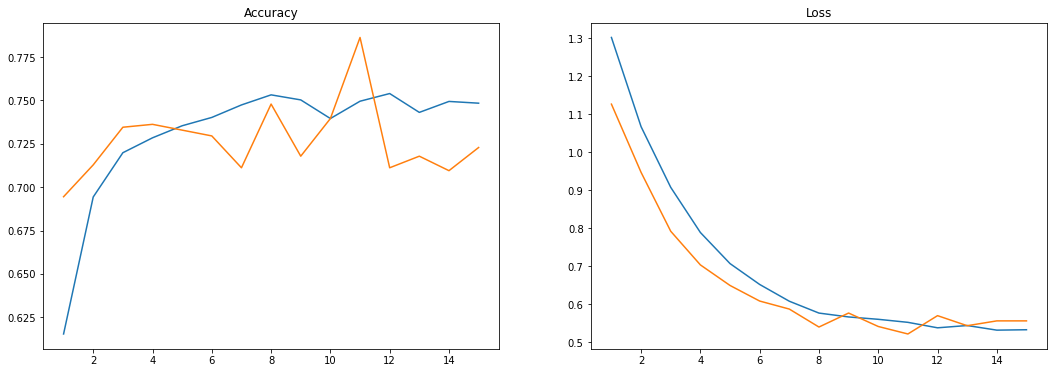

In [74]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax[0].title.set_text("Accuracy")
ax[0].plot(np.arange(1,16,1),metrics['accuracy'],color='tab:blue')
ax[0].plot(np.arange(1,16,1),metrics['val_accuracy'],color='tab:orange')
ax[1].title.set_text("Loss")
ax[1].plot(np.arange(1,16,1),metrics['loss'],color='tab:blue')
ax[1].plot(np.arange(1,16,1),metrics['val_loss'],color='tab:orange')
plt.show()

Melihat kondisi metrics berdasarkan accuracy dan loss yang dihasilkan :

Kondisinya cukup baik , karena tidak mengandung gradient exploding atau anomali pada grafik, sehingga model masih dapat digunakan (valid) namun reliabilitasnya tergantung dari hasil classification reportnya

In [75]:
backend.clear_session()

Kita lihat bagaimana kondisi data tersebut dengan memanfaatkan metrics classification report dan roc auc. Di sini saya menggunakan angka 0.42, karena data cenderung menghasilkan miring ke kiri ,yang akan saya buktikan dengan melihat persebaran datanya


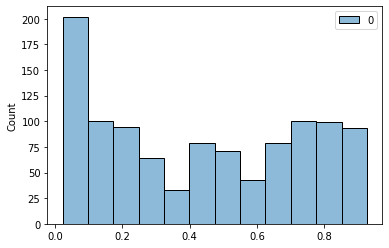

In [76]:
y_pred = model.predict(X_test_final)
sns.histplot(data=y_pred)

Dapat dilihat dari persebaran di atas, data cenderung miring ke kiri , sehingga saya coba menggunakan 0.42 untuk membedakan , mana yang y_pred = 1 dan y_pred = 0

In [77]:
y_pred_round = np.where(y_pred>=0.5,1,0)
print(classification_report(y_test,y_pred_round))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       777
           1       0.51      0.81      0.63       280

    accuracy                           0.74      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.81      0.74      0.76      1057



Dari hasil di atas :

Perlu kita ketahui , kita sedang menganalisa Churn dari pelanggan, maka goals kita adalah *dari semua yang benar - benar positif Churn , berapa persen yang terprediksi positif ?*. Maka kita akan ingin bahwa recall 1 menghasilkan hasil sebesar mungkin (sehingga false negative-nya se-sedikit mungkin). Mengapa tidak precision saja yang besar ? Karena jika misalkan terprediksi Churn , ternyata tidak, masih tidak begitu masalah.

Di sini precision pada label 1 menghasilkan angka 0.80 , artinya dari 100 data yang benar - benar Churn , ada 80 yang terprediksi Churn.

Melihat dari angkanya yaitu 0.80, sebenarnya model ini tidak begitu reliabel, faktor diluar seperti mencoba tuning dari mengganti initializer, activation function, dll yaitu misalnya feature selection , mungkin mempengaruhi keberhasilan lain untuk bisa mendapatkan nilai recall / metrics yang lebih tinggi lagi.

Sekarang, kita lihat apakah roc_aucnya dapat di atas 0.5 sebagai thresholdnya

In [78]:
print(roc_auc_score(y_test,y_pred_round))

0.7644305019305019


# Special Case -> Functional API

Selanjutnya kita coba buat functional API untuk model yang serupa

In [79]:
# Functional API

data_in = Input(shape=X_train_final_balanced[1].shape)
hidden_layer_1 = Dense(16,activation='relu',kernel_initializer=he_uni,kernel_regularizer=regularizers.L1(0.01))(data_in)
hidden_layer_drop_1 = Dropout(0.25)(hidden_layer_1)
hidden_layer_normalization_1 = BatchNormalization()(hidden_layer_drop_1)

hidden_layer_2 = Dense(20,activation='relu',kernel_initializer=he_uni)(hidden_layer_normalization_1)
hidden_layer_drop_2 = Dropout(0.25)(hidden_layer_2)
hidden_layer_normalization_2 = BatchNormalization()(hidden_layer_drop_2)

hidden_layer_3 = Dense(24,activation='relu',kernel_initializer=he_uni)(hidden_layer_normalization_2)
hidden_layer_drop_3 = Dropout(0.25)(hidden_layer_3)
hidden_layer_normalization_3 = BatchNormalization()(hidden_layer_drop_3)

hidden_layer_4 = Dense(28,activation='relu',kernel_initializer=he_uni)(hidden_layer_normalization_3)
hidden_layer_drop_4 = Dropout(0.25)(hidden_layer_4)
hidden_layer_normalization_4 = BatchNormalization()(hidden_layer_drop_4)

out = Dense(1,activation='sigmoid')(hidden_layer_normalization_4)

model_functional = Model(inputs=data_in,outputs=out)

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                340       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                             

In [80]:
model_functional.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_functional = model_functional.fit(X_train_final_balanced,y_train_final_balanced,epochs=15,validation_data=(X_val_final,y_val))

Epoch 1/15
248/248 [==============================] - 3s 4ms/step - loss: 1.3485 - accuracy: 0.6007 - val_loss: 1.2551 - val_accuracy: 0.5860
Epoch 2/15
248/248 [==============================] - 1s 3ms/step - loss: 1.1021 - accuracy: 0.6855 - val_loss: 1.0460 - val_accuracy: 0.6377
Epoch 3/15
248/248 [==============================] - 1s 3ms/step - loss: 0.9441 - accuracy: 0.7056 - val_loss: 0.8851 - val_accuracy: 0.6678
Epoch 4/15
248/248 [==============================] - 1s 3ms/step - loss: 0.8180 - accuracy: 0.7233 - val_loss: 0.7782 - val_accuracy: 0.6711
Epoch 5/15
248/248 [==============================] - 1s 3ms/step - loss: 0.7237 - accuracy: 0.7293 - val_loss: 0.7057 - val_accuracy: 0.6628
Epoch 6/15
248/248 [==============================] - 1s 3ms/step - loss: 0.6540 - accuracy: 0.7352 - val_loss: 0.6398 - val_accuracy: 0.7012
Epoch 7/15
248/248 [==============================] - 1s 3ms/step - loss: 0.6084 - accuracy: 0.7421 - val_loss: 0.6289 - val_accuracy: 0.6845
Epoch 

In [81]:
metrics_functional = pd.DataFrame(history_functional.history)
metrics_functional.tail()

,loss,accuracy,val_loss,val_accuracy
10,0.554009,0.748926,0.562252,0.714524
11,0.551216,0.748926,0.560083,0.724541
12,0.544099,0.746778,0.547826,0.719533
13,0.541733,0.751200,0.554563,0.709516
14,0.540729,0.750948,0.550545,0.732888


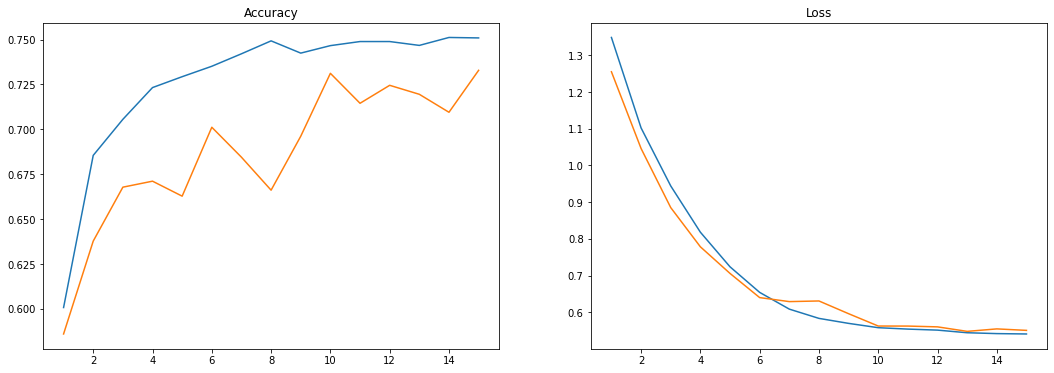

In [82]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax[0].title.set_text("Accuracy")
ax[0].plot(np.arange(1,16,1),metrics_functional['accuracy'],color='tab:blue')
ax[0].plot(np.arange(1,16,1),metrics_functional['val_accuracy'],color='tab:orange')
ax[1].title.set_text("Loss")
ax[1].plot(np.arange(1,16,1),metrics_functional['loss'],color='tab:blue')
ax[1].plot(np.arange(1,16,1),metrics_functional['val_loss'],color='tab:orange')
plt.show()

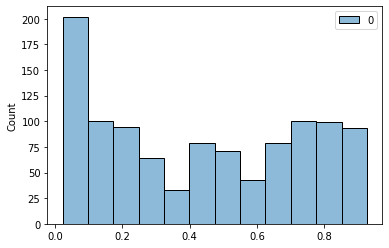

In [83]:
y_pred_functional = model.predict(X_test_final)
sns.histplot(data=y_pred_functional)

In [84]:
y_pred_functional_round = np.where(y_pred_functional>=0.5,1,0)
print(classification_report(y_test,y_pred_functional_round))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       777
           1       0.51      0.81      0.63       280

    accuracy                           0.74      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.81      0.74      0.76      1057



In [85]:
print(roc_auc_score(y_test,y_pred_functional_round))

0.7644305019305019


# 8. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

Model yang diimplementasi di atas adalah model dengan hasil terbaik yang saya sudah temukan , sehingga kita coba simpan model tersebut. Akan tetapi , kita perlu untuk melakukan pipeline untuk batch, model.save, serta penyimpanan preprocessing data menggunakan column transformer.

In [86]:
ct = ColumnTransformer([
                        ('mm_scaler',mm_scaler,num_skew),
                        ('std_scaler',std_scaler,num_normal),
                        ('cat_ohe',ohe,cat_feature)
])

In [87]:
X_train_fe = ct.fit_transform(X_train)

In [88]:
X_test_ct = ct.transform(X_test)
X_val_ct = ct.transform(X_val)

## Saving Preprocessing Transformer

In [89]:
# import pickle

# with open("fe_preprocessing.pkl","wb") as f:
#   pickle.dump(ct,f)

Setelah menyimpan pipeline preprocessing, sekarang kita coba menyimpan model (alias model.save()) , akan tetapi memanfaatkan pipeline dari tf.data (atau dalam kata lain tensor slicers) pada tahapan setelah ini

## Model with Pipeline

Sekarang kita lihat, bagaimana bentuk Functional API , setelah memanfaatkan pipeline seperti from_tensor_slices dengan batch 64

Untuk model yang menggunakan pipeline, ada beberapa perubahan tuning yang dilakukan, karena :

`Hasil antara memanfaatkan data sebelum di-pipeline dengan slicers , dan setelah di-pipeline dengan slicers, performanya berbeda. Maka dari itu , saya mencoba melakukan perubahan parameter tuning seperti regularizer atau bentuk node sehingga bisa mendapati performa accuracy dan loss sebaik mungkin yang dapat ditemukan`

In [232]:
from tensorflow.keras.optimizers import SGD,Adam,Adamax

In [237]:
def get_uncompiled_model():
  data_in = Input(shape=X_train_final_balanced[1].shape)
  hidden_layer_1 = Dense(20,activation='relu',kernel_initializer=he_uni,kernel_regularizer = regularizers.l1(0.01))(data_in)
  hidden_layer_drop_1 = Dropout(0.25)(hidden_layer_1)
  hidden_layer_normalization_1 = BatchNormalization()(hidden_layer_drop_1)

  hidden_layer_2 = Dense(20,activation='relu',kernel_initializer=he_uni)(hidden_layer_normalization_1)
  hidden_layer_drop_2 = Dropout(0.25)(hidden_layer_2)
  hidden_layer_normalization_2 = BatchNormalization()(hidden_layer_drop_2)

  hidden_layer_3 = Dense(20,activation='relu',kernel_initializer=he_uni,kernel_regularizer = regularizers.l1(0.01))(hidden_layer_normalization_2)
  hidden_layer_drop_3 = Dropout(0.25)(hidden_layer_3)
  hidden_layer_normalization_3 = BatchNormalization()(hidden_layer_drop_3)

  hidden_layer_4 = Dense(20,activation='relu',kernel_initializer=he_uni)(hidden_layer_normalization_3)
  hidden_layer_drop_4 = Dropout(0.25)(hidden_layer_4)
  hidden_layer_normalization_4 = BatchNormalization()(hidden_layer_drop_4)





  out = Dense(1,activation='sigmoid')(hidden_layer_normalization_4)

  model_functional = Model(inputs=data_in,outputs=out)
  return model_functional

def get_compiled_model():
  model_functional = get_uncompiled_model()
  model_functional.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
  )
  return model_functional

train_dataset = Dataset.from_tensor_slices((X_train_final_balanced,y_train_final_balanced))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = Dataset.from_tensor_slices((X_val_final,y_val))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(64)

model_functional = get_compiled_model()

history_functional = model_functional.fit(train_dataset,epochs=30,validation_data=(val_dataset))



Epoch 1/30
124/124 [==============================] - 4s 7ms/step - loss: 2.7276 - accuracy: 0.5311 - val_loss: 2.4331 - val_accuracy: 0.7095
Epoch 2/30
124/124 [==============================] - 1s 4ms/step - loss: 2.4945 - accuracy: 0.5646 - val_loss: 2.2786 - val_accuracy: 0.7295
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 2.3346 - accuracy: 0.5643 - val_loss: 2.1417 - val_accuracy: 0.7329
Epoch 4/30
124/124 [==============================] - 0s 3ms/step - loss: 2.1813 - accuracy: 0.5706 - val_loss: 2.0077 - val_accuracy: 0.7295
Epoch 5/30
124/124 [==============================] - 0s 3ms/step - loss: 2.0389 - accuracy: 0.5744 - val_loss: 1.8760 - val_accuracy: 0.7362
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 1.8881 - accuracy: 0.5943 - val_loss: 1.7494 - val_accuracy: 0.7279
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 1.7654 - accuracy: 0.5964 - val_loss: 1.6207 - val_accuracy: 0.7329
Epoch 

Kita simpan hasil metrics.history nya ke dalam bentuk dataframe, agar dapat divisualisasikan

In [238]:
metrics_functional = pd.DataFrame(history_functional.history)
metrics_functional.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.713759,0.652009,0.680610,0.691152
26,0.702352,0.659970,0.672133,0.689482
27,0.697084,0.660601,0.648367,0.706177
28,0.686750,0.662118,0.668355,0.676127
29,0.678982,0.656558,0.641759,0.674457


Kita lihat visualisasinya terkait metrics, apakah performanya akan sama atau berbeda dengan model sebelumnya

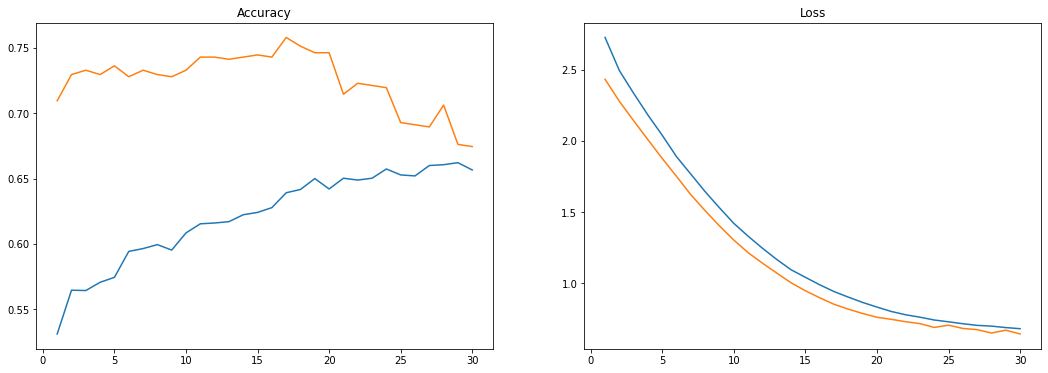

In [239]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax[0].title.set_text("Accuracy")
ax[0].plot(np.arange(1,31,1),metrics_functional['accuracy'],color='tab:blue')
ax[0].plot(np.arange(1,31,1),metrics_functional['val_accuracy'],color='tab:orange')
ax[1].title.set_text("Loss")
ax[1].plot(np.arange(1,31,1),metrics_functional['loss'],color='tab:blue')
ax[1].plot(np.arange(1,31,1),metrics_functional['val_loss'],color='tab:orange')
plt.show()

Ternyata, hasil yang ditampilkan menunjukkan bahwa data cenderung underfit dibandingkan di latih dengan data yang belum dilakukan pipeline, sekarang kita lihat bagaimana performanya dalam bentuk classification report

In [240]:
y_pred_pipeline = model_functional.predict(X_test_final)
y_pred_pipeline = np.where(y_pred_pipeline >= 0.5 , 1, 0)
y_pred_pipeline

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

Hasil classification report setelah menggunakan data pipeline

In [241]:
print(classification_report(y_test,y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       777
           1       0.45      0.88      0.59       280

    accuracy                           0.68      1057
   macro avg       0.69      0.75      0.67      1057
weighted avg       0.81      0.68      0.70      1057



Ternyata, setelah memanfaatkan data dari pipeline, recall pada label 1 lebih tinggi, namun precisionnya malah menurun bahkan hingga di 0.46 

## Saving Model With Pipeline

Kita coba simpan model neural network ini dengan nama neuralmodel_m1.h5

In [242]:
# model_functional.save('neuralmodel_m1.h5')

# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Kita coba manfaatkan 15 data pertama, untuk dilakukan preprocessing serta predict ke model, apakah bisa dimanfaatkan atau tidak

In [243]:
data_inf = df[selected_features][:15]
y_inf = df['Churn'][:15]

In [244]:
data_inf_final = ct.transform(data_inf)


In [245]:
y_inf_pred = model_functional.predict(data_inf_final)

In [246]:
np.array(y_inf)

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [247]:
y_inf_pred = np.where(y_inf_pred>=0.5,1,0)
y_inf_pred.flatten()

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

Dari kondisi uji coba di atas, dari 15 yang pada inference, ada 5 yang berbeda dengan prediction nya, atau sekitar 33% adalah salah prediksi , sehingga dapat dikatakan kualitas model ini masih belum terlalu dapat diandalkan.

# 10. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Yang dapat disimpulkan dari pembuatan model di atas adalah :

1. Dataset yang digunakan adalah dataset dengan total 20 features , yang kemudian dilakukan reduksi menjadi 6 features, dengan memanfaatkan feature importance dari RandomForestClassifier

2. Ada missing values yang perlu dihandle sebelum melakukan scaling, encoding serta feature selection untuk lebih transparan dalam memutuskan , fitur mana yang paling penting untuk digunakan sehingga dapat dilakukan seleksi dimensi.

3. Saya juga melakukan SMOTENC karena data cenderung terlihat imbalance , khususnya perbandingan antara 0 dan 1 (Not Churn dan Churn) adalah kurang lebih 3 : 1.

4. Model yang disimpan , adalah model yang telah dilakukan beberapa percobaan , sehingga hasilnya lebih tidak overfit (baik diukur dari val_accuracy - accuracy , dan val_loss - loss) 

5. Recall yang dihasilkan (pada 0 dan 1) adalah sebesar 0.73 dan 0.80 . Harapan yang diinginkan adalah menghasilkan recall pada model setinggi mungkin (yang berarti False Negative diminimalisir), sehingga data real positif adalah lebih sering terprediksi positif dibandingkan terprediksi negatif.

6. Saat memanfaatkan tensorslices dan batch (64) , kemampuan model menjadi menurun (hal ini yang sampai saat ini belum dapat saya temukan alasannya, mengapa bisa terjadi)